In [1]:
import scipy as sp
from scipy.io import arff
from cStringIO import StringIO
import pandas
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


#f = StringIO(content)
f="datasets/bal.arff"
data, meta = arff.loadarff(f)



In [2]:
print meta


Dataset: bal
	a1's type is numeric
	a2's type is numeric
	a3's type is numeric
	a4's type is numeric
	class's type is nominal, range is ('L', 'B', 'R')



In [3]:
print data.size
print len(data)
print len(data[0])


625
625
5


In [22]:
a=[]
data_num=np.zeros((len(data), len(data[0])-1))


print len(data_num)

i=0
for d in data:
    data_num[i,:]=[d[0],d[1],d[2],d[3]]
    i=i+1   
#print data_num 
    
  






150


"""
Checking similarity rules
   mumerical data 
       normalize data --> (max-value)/(max-min) // (value-min)/(max-min)
       check distance by difference between values.
  
   nominal/categorical --> example: colors red,blue,green,yellow (1,2,3,4)
       compare weather equal or not. not the distance of the value assigned.
validatin methods--> we can use the ones in sklearn lybrary
"""

### Cost function


In [32]:
def mean_squares(x):
    
    return (sp.spatial.distance.pdist([x[:x.shape[0]/2],x[x.shape[0]/2:]], 'euclidean'))**2


def cost_function(data_n,clusters_n):
    
    #find the centroids of each cluster 

    mus=np.array([data_n[np.where(clusters_n==k)].mean(axis=0) for k in range(len(np.unique(clusters_n)))])
    mus_complete=np.empty([clusters_n.shape[0],4])
    
    for k in range(len(np.unique(clusters_n))):
        
        mus_complete[np.where(clusters_n==k)]=mus[k]
    
    
    cost_f=sum(np.apply_along_axis(mean_squares, axis=1,arr=np.concatenate((data_n,mus_complete),axis=1))) 
    cost_f=cost_f/data_n.shape[0]
    
    return cost_f
                         
def plot_cost_function(clusters,mu,cost_function_acc, plotg=1):
    cost_function_acc=np.append(cost_function_acc,cost_function(clusters,mu));
    
    #print "cost function at steps 0 to ",len(cost_function_acc)," ",cost_function_acc
    if plotg==1:
        plt.plot(cost_function_acc,'g')
        plt.show()
    return cost_function_acc


### cluster division selection

In [6]:
#select_split_cluster based on defined criteria : larger, heterogenia

def select_split_cluster(clusters, criteria):
    
    selected_key_c=0
    number_of_x=[]
    
    if criteria == "larger":
        for i in np.nditer(np.unique(clusters)):

            number_of_x.append([len(clusters[np.where(clusters==i)]),i])
        
        selected_key_c=number_of_x[number_of_x.index(max(number_of_x))][1]
        
        print "Number of x in each cluster:", number_of_x

    return selected_key_c

### Bisecting Kmeans algorithm

In [26]:
#BKmeans
def Bk_means(X, K, k_means_iter=3):
    
    # Initialize one cluster with all data
    clusters=np.zeros((X.shape[0],1))
    
    
    #set initial number of cluster to 1 and iterate until number of clusters=K
    
    for k in range(1,K):
        print "*********** NEW ITERATION ************* ", k

        similarity=[]
        potential_new_clusters={}

        print "*********select cluster to split******"
        
        larger_cluster_index = select_split_cluster(clusters,"larger") #options: larger, heterogeny, 
        print "Selected cluster: ", larger_cluster_index
        

        kmeans_data=X[np.where(clusters==larger_cluster_index),:]
        kmeans_data=kmeans_data[0]
        print kmeans_data.shape
        
        print "*********Generate 2 clusters with Kmeans ******"
        print "*********Best of ", k_means_iter," results ******"
        
        for i in range(0,k_means_iter): 
        #if k_means_iter >1 then we select best k_means split with similarity 
            #potential_new_clusters[i] = KMeans(2, "random",1).fit_predict(kmeans_data)
            potential_new_clusters[i] = KMeans(2).fit_predict(kmeans_data)
            similarity.append(cost_function(kmeans_data,potential_new_clusters[i]))
        
        #Select division based on similarity (min value max similarity)
        selected_division=potential_new_clusters[similarity.index(min(similarity))]
        print "Selected case: ", similarity.index(min(similarity))
        
        new_clusters=selected_division
        new_clusters[np.where(selected_division==1)]=k
        new_clusters[np.where(selected_division==0)]=larger_cluster_index

        
        clusters[np.where(clusters[:]==larger_cluster_index)]=new_clusters

    print "****** END OF BKmeans *********\n\n\n"    
    return clusters



*********** NEW ITERATION *************  1
*********select cluster to split******
Number of x in each cluster: [[150, array(0.0)]]
Selected cluster:  0.0
(150, 4)
*********Generate 2 clusters with Kmeans ******
*********Best of  1  results ******
Selected case:  0
****** END OF BKmeans *********





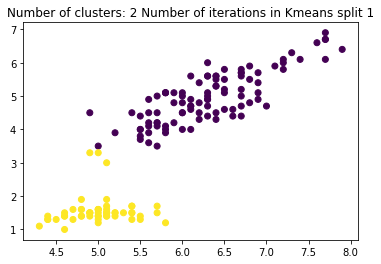

(150, 4)
(150, 1)


In [33]:
plt.figure(1)
cluster_assingment=Bk_means(data_num,2,1)
plt.title("Number of clusters: 2 Number of iterations in Kmeans split 1" )
plt.scatter(data_num[:, 0], data_num[:, 2], c=cluster_assingment)
plt.show()
print data_num.shape
print cluster_assingment.shape


### Bisecting Kmeas results for different values of K cluster and iterations of the Kmeans call 

*********** NEW ITERATION *************  1
*********select cluster to split******
Number of x in each cluster: [[150, array(0.0)]]
Selected cluster:  0.0
(150, 4)
*********Generate 2 clusters with Kmeans ******
*********Best of  1  results ******
mus in cost_function [[ 6.30103093  2.88659794  4.95876289  1.69587629]
 [ 5.00566038  3.36037736  1.56226415  0.28867925]]
Selected case:  0
****** END OF BKmeans *********



Global similarity:  mus in cost_function [ 6.30103093  5.00566038]
[ 29.04672133]
*********** NEW ITERATION *************  1
*********select cluster to split******
Number of x in each cluster: [[150, array(0.0)]]
Selected cluster:  0.0
(150, 4)
*********Generate 2 clusters with Kmeans ******
*********Best of  1  results ******
mus in cost_function [[ 5.00566038  3.36037736  1.56226415  0.28867925]
 [ 6.30103093  2.88659794  4.95876289  1.69587629]]
Selected case:  0
****** END OF BKmeans *********



Global similarity:  mus in cost_function [ 5.00566038  6.30103093]
[ i

mus in cost_function [[ 5.94745763  2.76610169  4.45423729  1.45423729]
 [ 6.85        3.07368421  5.74210526  2.07105263]]
mus in cost_function [[ 6.85        3.07368421  5.74210526  2.07105263]
 [ 5.94745763  2.76610169  4.45423729  1.45423729]]
mus in cost_function [[ 6.85        3.07368421  5.74210526  2.07105263]
 [ 5.94745763  2.76610169  4.45423729  1.45423729]]
mus in cost_function [[ 5.94745763  2.76610169  4.45423729  1.45423729]
 [ 6.85        3.07368421  5.74210526  2.07105263]]
mus in cost_function [[ 6.85        3.07368421  5.74210526  2.07105263]
 [ 5.94745763  2.76610169  4.45423729  1.45423729]]
mus in cost_function [[ 6.85        3.07368421  5.74210526  2.07105263]
 [ 5.94745763  2.76610169  4.45423729  1.45423729]]
Selected case:  0
****** END OF BKmeans *********



Global similarity:  mus in cost_function [ 5.00566038  6.85        5.94745763]
[ inf]
*********** NEW ITERATION *************  1
*********select cluster to split******
Number of x in each cluster: [[150,

mus in cost_function [[ 5.94745763  2.76610169  4.45423729  1.45423729]
 [ 6.85        3.07368421  5.74210526  2.07105263]]
mus in cost_function [[ 5.94745763  2.76610169  4.45423729  1.45423729]
 [ 6.85        3.07368421  5.74210526  2.07105263]]
mus in cost_function [[ 5.94745763  2.76610169  4.45423729  1.45423729]
 [ 6.85        3.07368421  5.74210526  2.07105263]]
mus in cost_function [[ 5.94745763  2.76610169  4.45423729  1.45423729]
 [ 6.85        3.07368421  5.74210526  2.07105263]]
mus in cost_function [[ 6.85        3.07368421  5.74210526  2.07105263]
 [ 5.94745763  2.76610169  4.45423729  1.45423729]]
mus in cost_function [[ 6.85        3.07368421  5.74210526  2.07105263]
 [ 5.94745763  2.76610169  4.45423729  1.45423729]]
mus in cost_function [[ 6.85        3.07368421  5.74210526  2.07105263]
 [ 5.94745763  2.76610169  4.45423729  1.45423729]]
mus in cost_function [[ 6.85        3.07368421  5.74210526  2.07105263]
 [ 5.94745763  2.76610169  4.45423729  1.45423729]]
Selected

mus in cost_function [[ 6.20588235  2.84117647  4.75        1.60294118]
 [ 5.596       2.664       4.052       1.252     ]]
Selected case:  0
*********** NEW ITERATION *************  4
*********select cluster to split******
Number of x in each cluster: [[53, array(0.0)], [34, array(1.0)], [38, array(2.0)], [25, array(3.0)]]
Selected cluster:  0.0
(53, 4)
*********Generate 2 clusters with Kmeans ******
*********Best of  4  results ******
mus in cost_function [[ 5.006       3.418       1.464       0.244     ]
 [ 5.          2.4         3.2         1.03333333]]
mus in cost_function [[ 5.006       3.418       1.464       0.244     ]
 [ 5.          2.4         3.2         1.03333333]]
mus in cost_function [[ 5.006       3.418       1.464       0.244     ]
 [ 5.          2.4         3.2         1.03333333]]
mus in cost_function [[ 5.006       3.418       1.464       0.244     ]
 [ 5.          2.4         3.2         1.03333333]]
Selected case:  0
*********** NEW ITERATION *************  5
**

Global similarity:  mus in cost_function [ 6.20588235  5.25555556  6.85        5.596       5.          4.71304348]
[ inf]


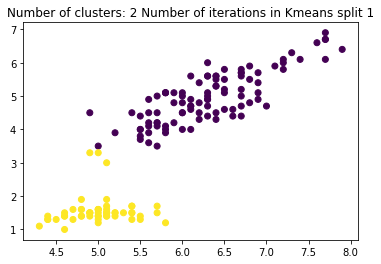

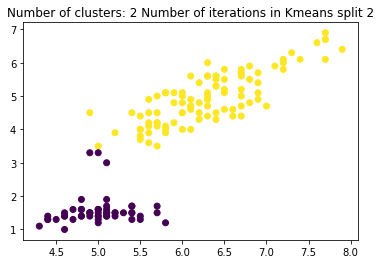

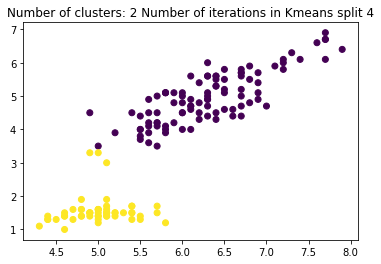

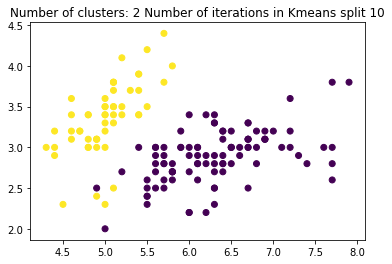

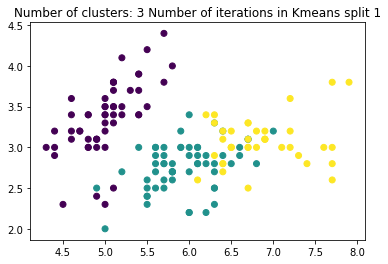

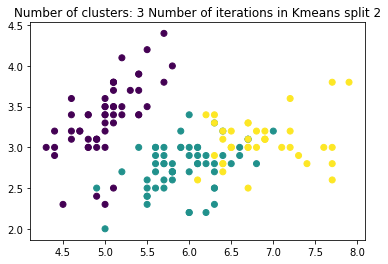

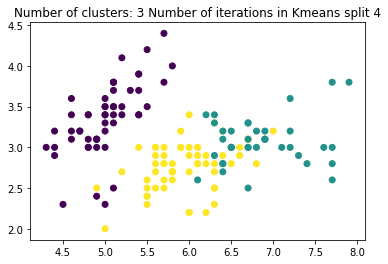

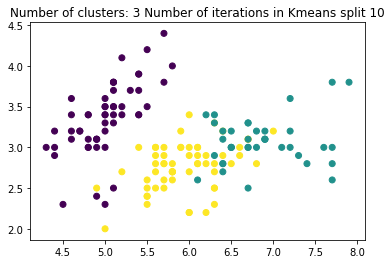

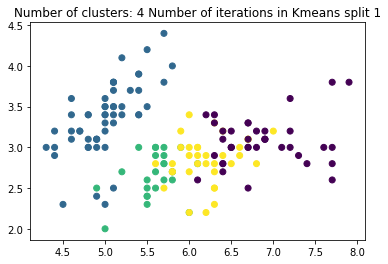

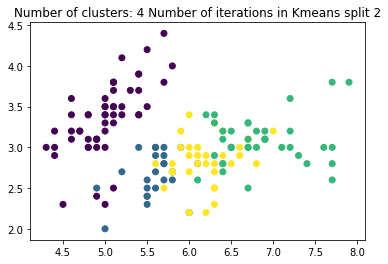

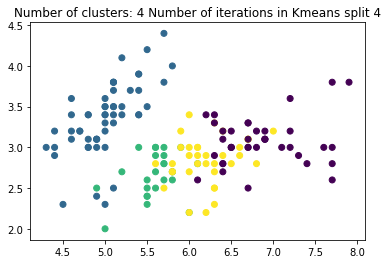

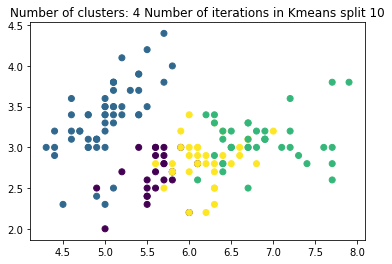

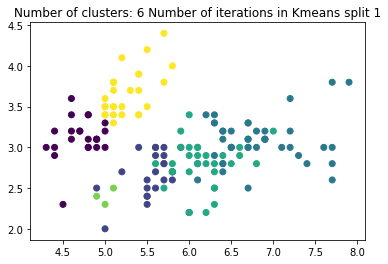

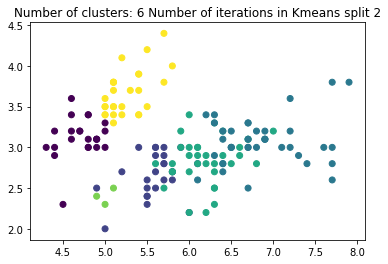

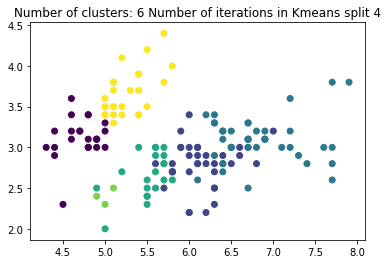

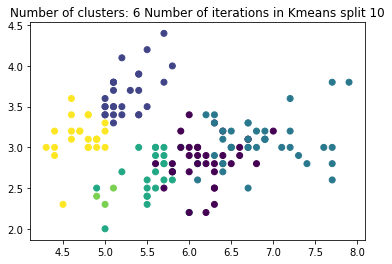

In [31]:
##Bisecting Kmeans results for diferent values of K and iterations on the Kmeans split

plt.figure()
cluster_assingment=Bk_means(data_num,2,1)
plt.title("Number of clusters: 2 Number of iterations in Kmeans split 1" )
plt.scatter(data_num[:, 0], data_num[:, 2], c=cluster_assingment)


plt.figure()
cluster_assingment=Bk_means(data_num,2,1)
plt.title("Number of clusters: 2 Number of iterations in Kmeans split 2" )
plt.scatter(data_num[:, 0], data_num[:, 2], c=cluster_assingment)



plt.figure()
cluster_assingment=Bk_means(data_num,2,)
plt.title("Number of clusters: 2 Number of iterations in Kmeans split 4" )
plt.scatter(data_num[:, 0], data_num[:, 2], c=cluster_assingment)
print "Global similarity: ",cost_function(data_num,cluster_assingment)


plt.figure()
cluster_assingment=Bk_means(data_num,2,10)
plt.title("Number of clusters: 2 Number of iterations in Kmeans split 10" )
plt.scatter(data_num[:, 0], data_num[:, 1], c=cluster_assingment)



plt.figure()
cluster_assingment=Bk_means(data_num,3,1)
plt.title("Number of clusters: 3 Number of iterations in Kmeans split 1" )
plt.scatter(data_num[:, 0], data_num[:, 1], c=cluster_assingment)


plt.figure()
cluster_assingment=Bk_means(data_num,3,2)
plt.title("Number of clusters: 3 Number of iterations in Kmeans split 2" )
plt.scatter(data_num[:, 0], data_num[:, 1], c=cluster_assingment)


plt.figure()
cluster_assingment=Bk_means(data_num,3,4)
plt.title("Number of clusters: 3 Number of iterations in Kmeans split 4" )
plt.scatter(data_num[:, 0], data_num[:, 1], c=cluster_assingment)


plt.figure()
cluster_assingment=Bk_means(data_num,3,10)
plt.title("Number of clusters: 3 Number of iterations in Kmeans split 10" )
plt.scatter(data_num[:, 0], data_num[:, 1], c=cluster_assingment)




plt.figure()
cluster_assingment=Bk_means(data_num,4,1)
plt.title("Number of clusters: 4 Number of iterations in Kmeans split 1" )
plt.scatter(data_num[:, 0], data_num[:, 1], c=cluster_assingment)


plt.figure()
cluster_assingment=Bk_means(data_num,4,2)
plt.title("Number of clusters: 4 Number of iterations in Kmeans split 2" )
plt.scatter(data_num[:, 0], data_num[:, 1], c=cluster_assingment)


plt.figure()
cluster_assingment=Bk_means(data_num,4,4)
plt.title("Number of clusters: 4 Number of iterations in Kmeans split 4" )
plt.scatter(data_num[:, 0], data_num[:, 1], c=cluster_assingment)


plt.figure()
cluster_assingment=Bk_means(data_num,4,10)
plt.title("Number of clusters: 4 Number of iterations in Kmeans split 10" )
plt.scatter(data_num[:, 0], data_num[:, 1], c=cluster_assingment)


plt.figure()
cluster_assingment=Bk_means(data_num,6,1)
plt.title("Number of clusters: 6 Number of iterations in Kmeans split 1" )
plt.scatter(data_num[:, 0], data_num[:, 1], c=cluster_assingment)

plt.figure()
cluster_assingment=Bk_means(data_num,6,2)
plt.title("Number of clusters: 6 Number of iterations in Kmeans split 2" )
plt.scatter(data_num[:, 0], data_num[:, 1], c=cluster_assingment)


plt.figure()
cluster_assingment=Bk_means(data_num,6,4)
plt.title("Number of clusters: 6 Number of iterations in Kmeans split 4" )
plt.scatter(data_num[:, 0], data_num[:, 1], c=cluster_assingment)


plt.figure()
cluster_assingment=Bk_means(data_num,6,10)
plt.title("Number of clusters: 6 Number of iterations in Kmeans split 10" )
plt.scatter(data_num[:, 0], data_num[:, 1], c=cluster_assingment)



plt.show()





In [13]:

color_array=['bo', 'go','co', 'mo', 'yo', 'ko', 'bx','gx','cx', 'mx', 'yx', 'kx'];


def plot_BKmeans_result(mus,clusters):
    c_i=0
    for key,values in mus.iteritems():
        plt.plot(values[0], values[1],'ro')



        for c_x in clusters[c_i] :
                #print "element in cluster ", key ,":",c
                #print color_array[c_i]
                #print c[0]
                #print c[1]
                plt.plot(c_x[0], c_x[1],color_array[c_i])

        c_i = c_i + 1
    


    #print "Number of clusters:", c_i   
    plt.show()
    

### Performance evaluation with Iris dataset

In [16]:
#check results

print "****** Performance evaluation with Iris dataset *********\n\n\n" 

#f = StringIO(content)
f="datasets/iris.arff"
data, meta = arff.loadarff(f)

a=[]
data_num=np.zeros((150, 4))
i=0
for d in data:
    data_num[i,:]=[d[0],d[1],d[2],d[3]]
    i=i+1   


d_Iris_setosa=data_num[np.where(data["class"]=="Iris-setosa")]
d_Iris_versicolor=data_num[np.where(data["class"]=="Iris-versicolor")]
d_Iris_virginica=data_num[np.where(data["class"]=="Iris-virginica")]

cluster_assingment=Bk_means(data_num,3,2)

results_c1=data_num[np.where(cluster_assingment[:]==0),:][0]
results_c2=data_num[np.where(cluster_assingment[:]==1),:][0]
results_c3=data_num[np.where(cluster_assingment[:]==2),:][0]

results_sumary(results_c1, results_c2, results_c3)


****** Performance evaluation with Iris dataset *********



*********** NEW ITERATION *************  1
*********select cluster to split******
Number of x in each cluster: [[150, array(0.0)]]
Selected cluster:  0.0
(150, 4)
*********Generate 2 clusters with Kmeans ******
*********Best of  2  results ******
Selected case:  0
*********** NEW ITERATION *************  2
*********select cluster to split******
Number of x in each cluster: [[53, array(0.0)], [97, array(1.0)]]
Selected cluster:  1.0
(97, 4)
*********Generate 2 clusters with Kmeans ******
*********Best of  2  results ******
Selected case:  0
****** END OF BKmeans *********



There are 50 entries classified as Setosa in Iris data file
There are 50 entries classified as Versicolor in Iris data file.
There are 50 entries classified as Virgini in Iris data file.

53 entries were classified in one cluster of which:

Intersection of C1 with Iris setosa  48
Intersection of C1 with Iris versicolor  3
Intersection of C1  with Iris virg

In [12]:

def results_sumary(results_c1, results_c2, results_c3):

    print "There are", len(d_Iris_setosa) ,"entries classified as Setosa in Iris data file"
    print "There are", len(d_Iris_versicolor) ,"entries classified as Versicolor in Iris data file."
    print "There are", len(d_Iris_virginica) ,"entries classified as Virgini in Iris data file.\n"

    print len(results_c1), "entries were classified in one cluster of which:\n"
    sett=set(map(tuple, d_Iris_setosa)).intersection(map(tuple, list(results_c1)))
    d=len(sett)
    print"Intersection of C1 with Iris setosa ",d
    sett=set(map(tuple, d_Iris_versicolor)).intersection(map(tuple, results_c1))
    d=len(sett)
    print "Intersection of C1 with Iris versicolor ",d
    sett=set(map(tuple, d_Iris_virginica)).intersection(map(tuple, results_c1))
    d=len(sett)
    print "Intersection of C1  with Iris virgini ",d

    print "************************************* \n"

    print len(results_c2), "entries were classified in one cluster of which:\n"
    sett=set(map(tuple, d_Iris_setosa)).intersection(map(tuple, results_c2))
    d=len(sett)
    print "intersection with Iris setosa ",d
    sett=set(map(tuple, d_Iris_versicolor)).intersection(map(tuple, results_c2))
    d=len(sett)
    print "intersection with Iris versicolor ",d
    sett=set(map(tuple, d_Iris_virginica)).intersection(map(tuple, results_c2))
    d=len(sett)
    print "intersection with Iris virgini ",d

    print "************************************* "

    print len(results_c3), "entries were classified in one cluster of which:\n"
    sett=set(map(tuple, d_Iris_setosa)).intersection(map(tuple, results_c3))
    d=len(sett)
    print "intersection with Iris setosa ",d
    sett=set(map(tuple, d_Iris_versicolor)).intersection(map(tuple, results_c3))
    d=len(sett)
    print "intersection with Iris versicolor ",d
    sett=set(map(tuple, d_Iris_virginica)).intersection(map(tuple, results_c3))
    d=len(sett)
    print "intersection with Iris virgini\n ",d



In [ ]:
### Performance evaluation with Balance dataset

In [331]:
#check results

print "****** Performance evaluation with Balance dataset *********\n\n\n" 

#f = StringIO(content)
f="datasets/bal.arff"
data, meta = arff.loadarff(f)

a=[]
data_num=np.zeros((len(data), len(data[0])-1))
i=0
for d in data:
    data_num[i,:]=[d[0],d[1],d[2],d[3]]
    i=i+1   


d_L=data_num[np.where(data["class"]=="L")]
d_B=data_num[np.where(data["class"]=="B")]
d_R=data_num[np.where(data["class"]=="R")]


cluster_assingment=Bk_means(data_num,3,2)

results_c1=data_num[np.where(cluster_assingment[:]==0),:][0]
results_c2=data_num[np.where(cluster_assingment[:]==1),:][0]
results_c3=data_num[np.where(cluster_assingment[:]==2),:][0]

results_sumary_balance(results_c1, results_c2, results_c3)

****** Performance evaluation with Balance dataset *********



*********** NEW ITERATION *************  1
*********select cluster to split******
Number of x in each cluster: [[625, array(0.0)]]
Selected cluster:  0.0
(625, 4)
*********Generate 2 clusters with Kmeans ******
*********Best of  2  results ******
Selected case:  0
*********** NEW ITERATION *************  2
*********select cluster to split******
Number of x in each cluster: [[340, array(0.0)], [285, array(1.0)]]
Selected cluster:  0.0
(340, 4)
*********Generate 2 clusters with Kmeans ******
*********Best of  2  results ******
Selected case:  1
****** END OF BKmeans *********



There are 288 entries classified as Setosa in Iris data file
There are 49 entries classified as Versicolor in Iris data file.
There are 288 entries classified as Virgini in Iris data file.

176 entries were classified in one cluster of which:

Intersection of C1 with Balance L  146
Intersection of C1 with Balance B  13
Intersection of C1  with Balanc

In [330]:
def results_sumary_balance(results_c1, results_c2, results_c3):


    print "There are", len(d_L) ,"entries classified as Setosa in Iris data file"
    print "There are", len(d_B) ,"entries classified as Versicolor in Iris data file."
    print "There are", len(d_R) ,"entries classified as Virgini in Iris data file.\n"

    print len(results_c1), "entries were classified in one cluster of which:\n"
    sett=set(map(tuple, d_L)).intersection(map(tuple, list(results_c1)))
    d=len(sett)
    print"Intersection of C1 with Balance L ",d
    sett=set(map(tuple, d_B)).intersection(map(tuple, results_c1))
    d=len(sett)
    print "Intersection of C1 with Balance B ",d
    sett=set(map(tuple, d_R)).intersection(map(tuple, results_c1))
    d=len(sett)
    print "Intersection of C1  with Balance R ",d

    print "************************************* \n"

    print len(results_c2), "entries were classified in one cluster of which:\n"
    sett=set(map(tuple, d_L)).intersection(map(tuple, results_c2))
    d=len(sett)
    print "intersection with Balance L ",d
    sett=set(map(tuple, d_B)).intersection(map(tuple, results_c2))
    d=len(sett)
    print "intersection with Balance B ",d
    sett=set(map(tuple, d_R)).intersection(map(tuple, results_c2))
    d=len(sett)
    print "intersection with Balance R ",d

    print "************************************* "

    print len(results_c3), "entries were classified in one cluster of which:\n"
    sett=set(map(tuple, d_L)).intersection(map(tuple, results_c3))
    d=len(sett)
    print "intersection with Balance L ",d
    sett=set(map(tuple, d_B)).intersection(map(tuple, results_c3))
    d=len(sett)
    print "intersection with Balance B ",d
    sett=set(map(tuple, d_R)).intersection(map(tuple, results_c3))
    d=len(sett)
    print "intersection with Balance R ",d




In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
>>> adjusted_rand_score([0, 0, 1, 1], [0, 0, 1, 1])
from sklearn.metrics.cluster import v_measure_score
>>> v_measure_score([0, 0, 1, 1], [0, 0, 1, 1])
from sklearn.metrics.cluster import homogeneity_score
>>> homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])
def purity(a,b):
    
    return sum([len()])